# Slamseq MV411 YLK inhib

In [2]:
from __future__ import print_function
import os.path
import pandas as pd
import sys
sys.path.insert(0, '../../')
import seaborn as sns
import numpy as np

from JKBio.utils import helper as h
from JKBio.rna import pyDESeq2
from JKBio import rna

from JKBio.utils import plot

from bokeh.plotting import *
from bokeh.models import HoverTool
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
#from umap import UMAP

output_notebook()
%load_ext autoreload
%matplotlib inline
%autoreload 2
%load_ext rpy2.ipython

Loading BokehJS ...

downloading their data

## downloading the data

In [3]:
version="v1"
project="slamseq_YLK_MV411"
location= '../data/'+project+"/"

In [3]:
mkdir ../$location

In [5]:
code = "MP8439"

In [8]:
!gsutil ls gs://transfer-amlproject/201120_MP8439_fastq/

gs://transfer-amlproject/201120_MP8439_fastq/._multiqc_report.html
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_A_MP8439_S131_R1_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_A_MP8439_S131_R2_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_B_MP8439_S132_R1_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_B_MP8439_S132_R2_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_C_MP8439_S133_R1_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_C_MP8439_S133_R2_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_D_MP8439_S134_R1_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_DMSO_D_MP8439_S134_R2_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_YKL_A_MP8439_S135_R1_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/20201120_YKL_A_MP8439_S135_R2_001.fastq.gz
gs://transfer-amlproject/201120_MP8439_fastq/

In [10]:
! mkdir ../results/$project/

In [11]:
! gsutil -m cp gs://transfer-amlproject/201120_MP8439_fastq/multiqc_report.html ../results/$project/

Copying gs://transfer-amlproject/201120_MP8439_fastq/multiqc_report.html...
/ [1/1 files][  1.3 MiB/  1.3 MiB] 100% Done                                    
Operation completed over 1 objects/1.3 MiB.                                      


## Running slamdunk

In [13]:
bams= ! gsutil ls gs://transfer-amlproject/$project/
bams

['gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R1_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R2_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_B_MP8439_S132_R1_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_B_MP8439_S132_R2_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_C_MP8439_S133_R1_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_C_MP8439_S133_R2_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_D_MP8439_S134_R1_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_D_MP8439_S134_R2_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_YKL_A_MP8439_S135_R1_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_YKL_A_MP8439_S135_R2_001.fastq.gz',
 'gs://transfer-amlproject/slamseq_YLK_MV411/20201120_YKL_B_MP8439_S136_R1_001.fastq.gz',
 '

In [12]:
rename = {
"20201120_DMSO_A_MP8439_S131": "mr343-MV411-DMSO-r1",
"20201120_DMSO_B_MP8439_S132": "mr344-MV411-DMSO-r2",
"20201120_DMSO_C_MP8439_S133": "mr345-MV411-DMSO-r3",
"20201120_DMSO_D_MP8439_S134": "mr346-MV411-DMSO-r4",
"20201120_YKL_A_MP8439_S135": "mr347-MV411-YLK-r1",
"20201120_YKL_B_MP8439_S136": "mr348-MV411-YLK-r2",
"20201120_YKL_C_MP8439_S137": "mr349-MV411-YLK-r3",
"20201120_YKL_D_MP8439_S138": "mr350-MV411-YLK-r4",
}

In [15]:
for val in bams:
    ren  = val
    for old, new in rename.items():
        ren = ren.replace(old, new)
    if ren !=val:
        ! gsutil mv $val $ren

Copying gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R1_001.fastq.gz [Content-Type=application/octet-stream]...
Removing gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R1_001.fastq.gz...
-
Operation completed over 1 objects/3.0 GiB.                                      
Copying gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R2_001.fastq.gz [Content-Type=application/octet-stream]...
Removing gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_A_MP8439_S131_R2_001.fastq.gz...

Operation completed over 1 objects/3.0 GiB.                                      
Copying gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_B_MP8439_S132_R1_001.fastq.gz [Content-Type=application/octet-stream]...
Removing gs://transfer-amlproject/slamseq_YLK_MV411/20201120_DMSO_B_MP8439_S132_R1_001.fastq.gz...

Operation completed over 1 objects/3.9 GiB.                                      
Copying gs://transfer-amlproject/slamse

In [16]:
bams= ! gsutil ls gs://transfer-amlproject/$project/
bams

In [29]:
df = []
for val1, val2 in h.grouped(bams,2):
    df.append(['MV411', val1.split('/')[-1].split('-')[2], 1 if val1.split('/')[-1].split('-')[2]=='DMSO' else 0, val1, val2, '-'.join(val1.split('/')[-1].split('-')[:3])])
df = pd.DataFrame(data=df, columns=['group','condition', 'control', 'reads1','reads2', 'name'])
df.to_csv('../nextflow/'+project+'.csv', index=None)
df

,group,condition,control,reads1,reads2,name
0,MV411,DMSO,1,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr343-MV411-DMSO
1,MV411,DMSO,1,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr344-MV411-DMSO
2,MV411,DMSO,1,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr345-MV411-DMSO
3,MV411,DMSO,1,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr346-MV411-DMSO
4,MV411,YLK,0,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr347-MV411-YLK
5,MV411,YLK,0,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr348-MV411-YLK
6,MV411,YLK,0,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr349-MV411-YLK
7,MV411,YLK,0,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,gs://transfer-amlproject/slamseq_YLK_MV411/mr3...,mr350-MV411-YLK


In [30]:
! gsutil -m cp gs://transfer-amlproject/$project/*.fastq.gz ../../data/$project/fastqs

Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr343-MV411-DMSO-r1_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr343-MV411-DMSO-r1_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr344-MV411-DMSO-r2_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr344-MV411-DMSO-r2_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr345-MV411-DMSO-r3_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr345-MV411-DMSO-r3_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr346-MV411-DMSO-r4_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr346-MV411-DMSO-r4_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr347-MV411-YLK-r1_R1_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr347-MV411-YLK-r1_R2_001.fastq.gz...
Copying gs://transfer-amlproject/slamseq_YLK_MV411/mr348-MV411-YLK-r2_R1_001.fastq.gz...
Copying gs://

In [ ]:
! export NXF_VER=19.10.0 && export GOOGLE_APPLICATION_CREDENTIALS=aml-chipseq-rnaseq-9dcbe47182cf.json && export NXF_MODE=google && cd ../.. && ./nextflow run jkobject/slamseq --input AMLproject/nextflow/slamseq_YLK_MV411.csv -profile jkcloud --genome GRCh38_spike -w gs://workamlproject/slamseqwork --read_length 120 --outdir gs://workamlproject/slamseq_ylk --tracedir AMLproject/nextflow/slamseq_ylk/ --spiking -resume distraught_gates

In [31]:
! pip3 install git+https://github.com/jkobject/slamdunk.git --upgrade
# please also install trimgalore and cutadapt

  Cloning https://github.com/jkobject/slamdunk.git to /tmp/pip-req-build-m0ncaac0
  Running setup.py bdist_wheel for slamdunk ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-icke8ysf/wheels/4c/b2/9c/e1153807b1571f6f12ee9761dcf5229ceee161c5c575b631fd
Successfully built slamdunk
  Found existing installation: slamdunk 0.4.0
    Uninstalling slamdunk-0.4.0:
      Successfully uninstalled slamdunk-0.4.0


In [41]:
folder_bams = "../../data/"+project+"/fastqs/"
bams = ! ls ../../data/$project/*.fastq.gz
bams

['../../data/slamseq_YLK_MV411/mr343-MV411-DMSO-r1_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr343-MV411-DMSO-r1_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr344-MV411-DMSO-r2_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr344-MV411-DMSO-r2_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr345-MV411-DMSO-r3_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr345-MV411-DMSO-r3_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr346-MV411-DMSO-r4_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr346-MV411-DMSO-r4_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr347-MV411-YLK-r1_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr347-MV411-YLK-r1_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr348-MV411-YLK-r2_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr348-MV411-YLK-r2_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr349-MV411-YLK-r3_R1_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr349-MV411-YLK-r3_R2_001.fastq.gz',
 '../../data/slamseq_YLK_MV411/mr350-MV4

In [42]:
h.parrun(['../../TrimGalore-0.6.5/trim_galore --paired --cores 14 --retain_unpaired -stringency 3 --illumina '+val1+ ' '+val2+' -o '+folder_bams for val1,val2 in h.grouped(bams,2)],2)

In [ ]:
rm ../../data/$project/*.fastq.gz

In [44]:
# using an ERCC ref genome (you can just append ERCC fasta to the hg38 fasta)
refgenome="../../data/ref/Homo_sapiens_assembly38_ERCC92.fasta"

In [46]:
bams = ! ls $folder_bams/*_val*.fq.gz
bams

['../../data/slamseq_YLK_MV411/fastqs//mr343-MV411-DMSO-r1_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr343-MV411-DMSO-r1_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr344-MV411-DMSO-r2_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr344-MV411-DMSO-r2_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr345-MV411-DMSO-r3_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr345-MV411-DMSO-r3_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr346-MV411-DMSO-r4_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr346-MV411-DMSO-r4_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr347-MV411-YLK-r1_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr347-MV411-YLK-r1_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr348-MV411-YLK-r2_R1_001_val_1.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr348-MV411-YLK-r2_R2_001_val_2.fq.gz',
 '../../data/slamseq_YLK_MV411/fastqs//mr349

In [48]:
# we are doing it paired end
h.parrun(['slamdunk all -r '+refgenome+' -b ../data/Muhar_Slamseq/GSE100708_hg38_refseq_062016_ensemblv84_3UTR.bed \
    -o ../../data/'+project+'/res/ -t 14 -c 2 -N '+val1.split('/')[-1].split('_R')[0]+' '+val1+" "+val2 for val1,val2 in h.grouped(bams,2)], 2)

## we first need to recreate out RNA matrix from slamdunk's tcount files

### Getting counts over ERCC genome

In [51]:
counts = {}
folder = "../../data/"+project+"/res/filter"
files = ! ls $folder/*
files = [file.split('/')[-1] for file in files if file.endswith(".bam")]
files

['mr343-MV411-DMSO-r1_filtered.bam',
 'mr344-MV411-DMSO-r2_filtered.bam',
 'mr345-MV411-DMSO-r3_filtered.bam',
 'mr346-MV411-DMSO-r4_filtered.bam',
 'mr347-MV411-YLK-r1_filtered.bam',
 'mr348-MV411-YLK-r2_filtered.bam',
 'mr349-MV411-YLK-r3_filtered.bam',
 'mr350-MV411-YLK-r4_filtered.bam']

In [ ]:
ERCC = ["ERCC-00002", "ERCC-00003", "ERCC-00004", "ERCC-00009", "ERCC-00012", "ERCC-00013", "ERCC-00014", "ERCC-00016", "ERCC-00017", "ERCC-00019", "ERCC-00022", "ERCC-00024", "ERCC-00025", "ERCC-00028", "ERCC-00031", "ERCC-00033", "ERCC-00034", "ERCC-00035", "ERCC-00039", "ERCC-00040", "ERCC-00041", "ERCC-00042", "ERCC-00043", "ERCC-00044", "ERCC-00046", "ERCC-00048", "ERCC-00051", "ERCC-00053", "ERCC-00054", "ERCC-00057", "ERCC-00058", "ERCC-00059", "ERCC-00060", "ERCC-00061", "ERCC-00062", "ERCC-00067", "ERCC-00069", "ERCC-00071", "ERCC-00073", "ERCC-00074", "ERCC-00075", "ERCC-00076", "ERCC-00077", "ERCC-00078", "ERCC-00079", "ERCC-00081", "ERCC-00083", "ERCC-00084", "ERCC-00085", "ERCC-00086", "ERCC-00092", "ERCC-00095", "ERCC-00096", "ERCC-00097", "ERCC-00098", "ERCC-00099", "ERCC-00104", "ERCC-00108", "ERCC-00109", "ERCC-00111", "ERCC-00112", "ERCC-00113", "ERCC-00116", "ERCC-00117", "ERCC-00120", "ERCC-00123", "ERCC-00126", "ERCC-00130", "ERCC-00131", "ERCC-00134", "ERCC-00136", "ERCC-00137", "ERCC-00138", "ERCC-00142", "ERCC-00143", "ERCC-00144", "ERCC-00145", "ERCC-00147", "ERCC-00148", "ERCC-00150", "ERCC-00154", "ERCC-00156", "ERCC-00157", "ERCC-00158", "ERCC-00160", "ERCC-00162", "ERCC-00163", "ERCC-00164", "ERCC-00165", "ERCC-00168", "ERCC-00170", "ERCC-00171"]

In [52]:
h.parrun(["samtools view -hb "+folder+"/"+f+" "+h.list_to_str(ERCC)+" > "+folder+"/ERCC_"+f for f in files],cores=10)

In [54]:
h.parrun(["bedtools genomecov -ibam "+folder+"/ERCC_"+f+" > "+folder+"/ERCC_"+f+".bed" for f in files],cores=10)

In [56]:
res  = {i:[] for i in files}
for val in files:
    cov = pd.read_csv(folder+"/ERCC_"+val+'.bed',sep="\t",header=None)
    for i in ERCC:
        res[val].append(cov[cov[0]==i][1].mean())
df = pd.DataFrame(data=res,index=ERCC)

In [61]:
cmd = "for unkn in $(ls ../../data/"+project+"/res/filter/mr*.bam); do samtools view -c -F 260 $unkn; done"
totalcounts = ! $cmd
totalcounts = [int(i) for i in totalcounts]
totalcounts

['89801221',
 '117227621',
 '105518865',
 '92347475',
 '48886271',
 '73119689',
 '61789625',
 '95835625']

In [124]:
ls ../../data/$project/res/filter/mr*.bam

../../data/slamseq_YLK_MV411/res/filter/mr343-MV411-DMSO-r1_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr344-MV411-DMSO-r2_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr345-MV411-DMSO-r3_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr346-MV411-DMSO-r4_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr347-MV411-YLK-r1_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr348-MV411-YLK-r2_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr349-MV411-YLK-r3_filtered.bam
../../data/slamseq_YLK_MV411/res/filter/mr350-MV411-YLK-r4_filtered.bam


## Saving the data in our bucket

In [63]:
! gsutil -m cp ../../data/$project/fastqs/* gs://amlproject/RNA/$project/fastqs/
! gsutil -m cp ../../data/$project/res/map/* gs://amlproject/RNA/slamseq_iBet_max/res/map/ 
! gsutil -m cp ../../data/$project/res/filter/* gs://amlproject/RNA/$project/res/filter/ 
! gsutil -m cp ../../data/$project/res/snp/* gs://amlproject/RNA/$project/res/snp/
! gsutil -m cp ../../data/$project/res/count/* gs://amlproject/RNA/$project/res/count/

Copying file://../../data/slamseq_YLK_MV411/fastqs/mr343-MV411-DMSO-r1_R1_001_val_1.fq.gz [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/fastqs/mr343-MV411-DMSO-r1_R1_001.fastq.gz_trimming_report.txt [Content-Type=text/plain]...
Copying file://../../data/slamseq_YLK_MV411/fastqs/mr343-MV411-DMSO-r1_R1_001_unpaired_1.fq.gz [Content-Type=application/octet-stream]...
==> NOTE: You are uploading one or more large file(s), which would run
significantly faster if you enable parallel composite uploads. This
feature can be enabled by editing the
"parallel_composite_upload_threshold" value in your .boto
configuration file. However, note that if you do this large files will
be uploaded as `composite objects
<https://cloud.google.com/storage/docs/composite-objects>`_,which
means that any user who downloads such objects will need to have a
compiled crcmod installed (see "gsutil help crcmod"). This is because
without a compiled crcmod, computing checksums on 

Copying file://../../data/slamseq_YLK_MV411/res/map/mr343-MV411-DMSO-r1_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr345-MV411-DMSO-r3_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr344-MV411-DMSO-r2_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr346-MV411-DMSO-r4_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr346-MV411-DMSO-r4_slamdunk_mapped.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr347-MV411-YLK-r1_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr345-MV411-DMSO-r3_slamdunk_mapped.bam [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/map/mr34

Copying file://../../data/slamseq_YLK_MV411/res/snp/mr343-MV411-DMSO-r1_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr343-MV411-DMSO-r1_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr344-MV411-DMSO-r2_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr344-MV411-DMSO-r2_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr345-MV411-DMSO-r3_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr345-MV411-DMSO-r3_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr346-MV411-DMSO-r4_snp.log [Content-Type=application/octet-stream]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr346-MV411-DMSO-r4_snp.vcf [Content-Type=text/vcard]...
Copying file://../../data/slamseq_YLK_MV411/res/snp/mr347-MV411-YLK-r1_s

In [126]:
res = df/(np.array(totalcounts)/100000)

In [183]:
df

,mr343-MV411-DMSO-r1_filtered.bam,mr344-MV411-DMSO-r2_filtered.bam,mr345-MV411-DMSO-r3_filtered.bam,mr346-MV411-DMSO-r4_filtered.bam,mr347-MV411-YLK-r1_filtered.bam,mr348-MV411-YLK-r2_filtered.bam,mr349-MV411-YLK-r3_filtered.bam,mr350-MV411-YLK-r4_filtered.bam
ERCC-00002,22306.447115,33596.481801,20934.812139,23955.884211,12462.001957,15260.880743,15582.170756,22239.651544
ERCC-00003,1565.544872,2558.020581,1340.399220,1682.882280,952.693572,1413.390604,1685.528455,1563.752246
ERCC-00004,1771.465934,2854.336134,1611.447727,2036.637969,1014.507042,1411.583333,1638.951501,1807.030172
ERCC-00009,423.015625,647.051233,396.896386,459.763441,257.798246,374.682809,380.614634,428.974771
ERCC-00012,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.400000
...,...,...,...,...,...,...,...,...
ERCC-00164,1.500000,3.000000,1.000000,1.500000,0.000000,1.500000,2.000000,1.500000
ERCC-00165,44.682353,80.914062,51.494624,56.059406,31.847458,36.742424,41.652778,58.972222
ERCC-00168,3.000000,4.500000,1.000000,1.500000,1.500000,1.000000,1.000000,1.500000
ERCC-00170,3.500000,5.500000,5.500000,5.000000,2.500000,2.500000,3.000000,7.000000


In [127]:
res.mean()

mr343-MV411-DMSO-r1_filtered.bam    1.054479
mr344-MV411-DMSO-r2_filtered.bam    1.244227
mr345-MV411-DMSO-r3_filtered.bam    0.831983
mr346-MV411-DMSO-r4_filtered.bam    1.118314
mr347-MV411-YLK-r1_filtered.bam     1.118332
mr348-MV411-YLK-r2_filtered.bam     0.932608
mr349-MV411-YLK-r3_filtered.bam     1.220788
mr350-MV411-YLK-r4_filtered.bam     0.995681
dtype: float64

In [128]:
prev=0
r={}
for val in [4,4]:
    r[res.columns[prev].split('-')[2]]=[res[res.columns[prev:prev+val]].sum().mean(), res[res.columns[prev:prev+val]].sum().var()**(1/2)]
    prev+=val

In [129]:
r

{'DMSO': [97.72708711152382, 15.876520839037093],
 'YLK': [98.15039682666358, 11.809637537738645]}

In [130]:
mkdir ../results/$project/plots/

mkdir: cannot create directory ‘../results/slamseq_YLK_MV411/plots/’: File exists


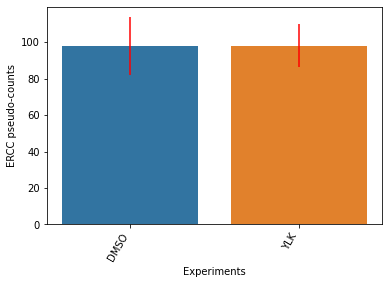

In [131]:
d= pd.DataFrame(data=r.values(),index=r.keys(), columns=['ERCC pseudo-counts','var'])
d['Experiments']=d.index
sns.barplot("Experiments","ERCC pseudo-counts",data=d,ci=None,)
plt.errorbar(x=range(0,len(d)),y=d['ERCC pseudo-counts'],
            yerr=d['var'], fmt='none', c= 'r')
plt.xticks(rotation=60,ha='right')
plt.savefig('../results/'+project+"/plots/"+version+"_scaling_fact_with_conf.pdf")

In [5]:
location= '../../data/'+project+'/res/count/'
mincount_toremove=5
minvar_toremove=0

In [20]:
readcounts, tccounts = rna.readFromSlamdunk(loc=location,minvar_toremove=minvar_toremove, mincount_toremove=mincount_toremove)

found 8 files:dict_keys(['mr349-MV411-YLK-r3_tcount', 'mr343-MV411-DMSO-r1_tcount', 'mr345-MV411-DMSO-r3_tcount', 'mr347-MV411-YLK-r1_tcount', 'mr348-MV411-YLK-r2_tcount', 'mr344-MV411-DMSO-r2_tcount', 'mr346-MV411-DMSO-r4_tcount', 'mr350-MV411-YLK-r4_tcount'])
496 182
[345, 68] [2, 2]
1342 521
[581, 136] [13, 1]
1544 566
[631, 190] [13, 4]
331 112
[331, 91] [3, 1]
577 196
[356, 105] [1, 0]
1982 813
[635, 179] [8, 4]
1529 607
[576, 150] [7, 0]
780 296
[603, 169] [6, 2]
you need access to taiga for this (https://pypi.org/project/taigapy/)
1118 could not be parsed... we don't have all genes already
you need access to taiga for this (https://pypi.org/project/taigapy/)
1118 could not be parsed... we don't have all genes already


## SLAM-seq
All SLAM-seq assays were performed at 60-70% confluency for adherent cells or
60% of the maximum cell density counted on a hemocytometer for suspension cells. 5-7h
prior to each assay, growth medium was aspirated and replaced. Unless stated otherwise,
cells were pre-treated with indicated small molecule inhibitors or 100µM IAA for 30 min
to pre-establish full target inhibition or degradation. Newly synthesized RNA was labeled
for indicated time spans (45 min or 60 min) at a final concentration of 100µM 4-
thiouridine (4sU, Carbosynth). Adherent cells were harvested by direct snap-freezing of
plates on dry ice. Suspension cells were spun down and immediately snap-frozen. RNA
extraction was performed using the RNeasy Plus Mini Kit (Qiagen). 

Total RNA was subjected to alkylation by iodoacetamide (Sigma, 10mM) for 15 min and RNA was repurified by ethanol precipitation. 500ng alkylated RNA were used as input for generating
3’-end mRNA sequencing libraries using a commercially available kit (QuantSeq 3′
mRNA-Seq Library Prep Kit FWD for Illumina and PCR Add-on Kit for Illumina,
Lexogen). Deep sequencing was performed using HiSeq1500 and HiSeq2500 platforms
(Illumina).

0.06724463
0.04916348
0.03728357
0.05075007
0.03331248
0.0346662
0.03265504 
0.04416262
0.05574821
0.05845953
0.05531433
0.06175393
0.03181749 
0.02940226 
0.0306263
0.04004278

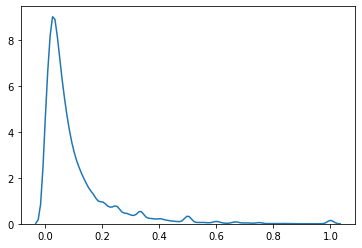

In [23]:
#what is the average of highly transcribed genes 
a = tccounts[readcounts.sum(1)>30] / readcounts[readcounts.sum(1)>30]
a = a.fillna(0)
a = a.max(1).tolist()
a.sort()
sns.kdeplot(a)

In [24]:
np.median(a)

0.05759628657770703

In [45]:
a = readcounts.columns.tolist()
a.sort()
readcounts=  readcounts[a]
tccounts = tccounts[a]

In [25]:
readcounts.to_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_readcounts.csv')
tccounts.to_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_tccounts.csv')

In [43]:
readcounts = pd.read_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_readcounts.csv',index_col=0)
tccounts = pd.read_csv('../results/'+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+'_tccounts.csv',index_col=0)

### make more dataframes

In [144]:
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
for i in set([i.split('-')[2] for i in tccounts.columns]):
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].mean(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].mean(1)

In [145]:
mtccounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_mean_tccounts.csv")
mreadcounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_mean_readcounts.csv")

In [146]:
mtccounts = pd.DataFrame()
mreadcounts = pd.DataFrame()
for i in set([i.split('-')[2] for i in tccounts.columns]):
    mtccounts[i] = tccounts[[v for v in tccounts.columns if i in v]].median(1)
    mreadcounts[i] = readcounts[[v for v in readcounts.columns if i in v]].median(1)

In [147]:
mtccounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_median_tccounts.csv")
mreadcounts.to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_median_readcounts.csv")

In [148]:
(tccounts/readcounts).fillna(0).to_csv("../results/"+project+'/'+version+'_'+str(minvar_toremove)+'_'+str(mincount_toremove)+"_tccounts_per_readcounts.csv")

# lets look at the similarity accross replicates

we have some outliers, else it seems to make some sense and on average, to be extremelly similar!

In [47]:
tccounts.columns = [i.replace('-','.') for i in tccounts.columns]
readcounts.columns = [i.replace('-','.') for i in readcounts.columns]

In [151]:
(tccounts.loc["MYC"]/tccounts.mean(0)) /(readcounts.loc["MYC"]/readcounts.mean(0))

mr343.MV411.DMSO.r1_tcount    10.125621
mr344.MV411.DMSO.r2_tcount    10.687586
mr345.MV411.DMSO.r3_tcount    10.590205
mr346.MV411.DMSO.r4_tcount    10.082057
mr347.MV411.YLK.r1_tcount     11.008497
mr348.MV411.YLK.r2_tcount     10.029397
mr349.MV411.YLK.r3_tcount      9.656311
mr350.MV411.YLK.r4_tcount      9.315082
dtype: float64

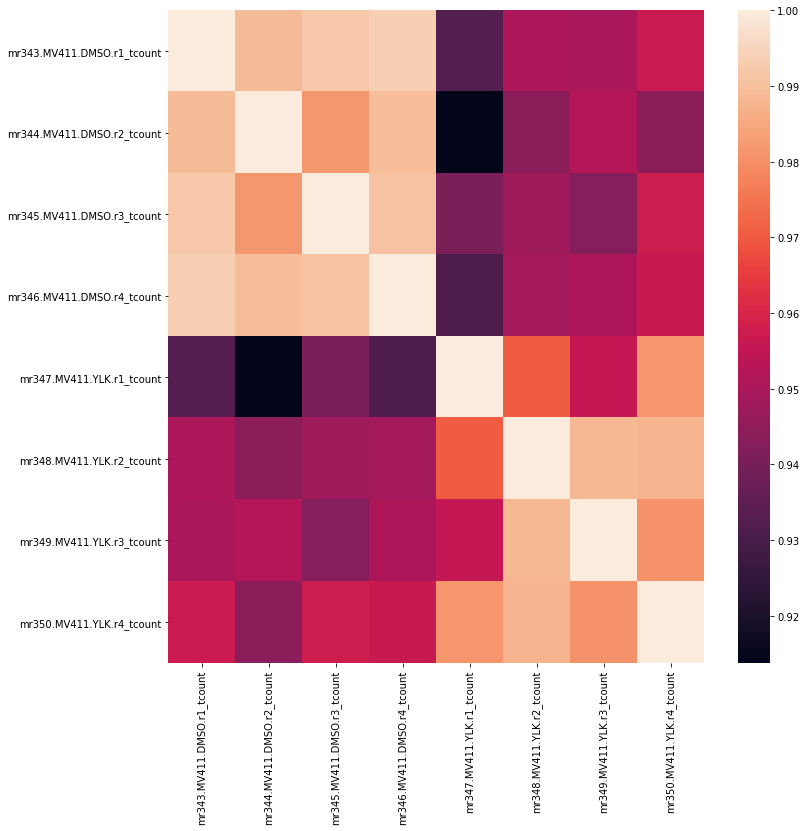

In [152]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(tccounts.corr(), 
            xticklabels=tccounts.columns,
            yticklabels=tccounts.columns, ax=ax)
plt.savefig('../results/'+project+'/plots/'+version+'_similarity_replicates_sorted_readcounts.pdf')

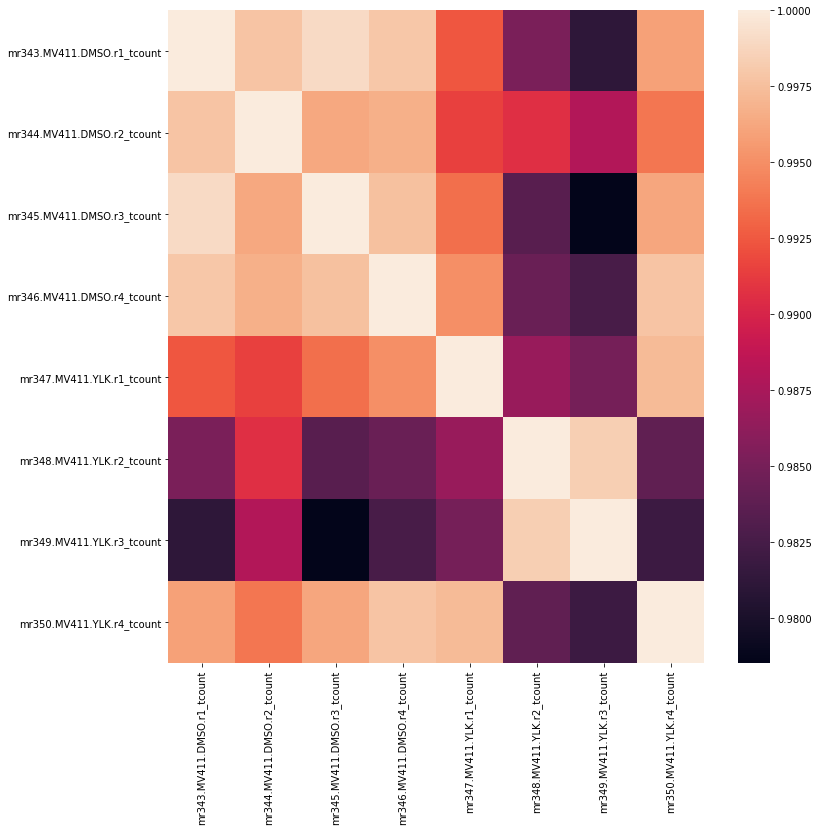

In [153]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(readcounts.corr(), 
            xticklabels=readcounts.columns,
            yticklabels=readcounts.columns, ax=ax)
plt.savefig('../results/'+project+'/plots/'+version+'_similarity_replicates.pdf')

### A quick detour to look for clustering

## Getting the Core TF information

In [9]:
ctf=pd.read_csv('../data/CRCs.txt',header=None)[0].values.tolist()
ctf

['CEBPA',
 'E2F3',
 'FLI1',
 'FOSL2',
 'GFI1',
 'HEX',
 'IRF8',
 'LYL1',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MYB',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZNF281',
 'LMO2',
 'ZMYND8',
 'GATA2',
 'MAX',
 'MYC',
 'ETV6',
 'HOXA9']

In [10]:
set(ctf) -  set(tccounts.index)

{'CEBPA',
 'E2F3',
 'ETV6',
 'FLI1',
 'FOSL2',
 'GATA2',
 'GFI1',
 'HEX',
 'HOXA9',
 'IRF8',
 'LMO2',
 'LYL1',
 'MAX',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MYB',
 'MYC',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZMYND8',
 'ZNF281'}

In [157]:
set(ctf) & set(tccounts.index)

{'CEBPA',
 'E2F3',
 'ETV6',
 'FLI1',
 'FOSL2',
 'GATA2',
 'GFI1',
 'HOXA9',
 'IRF8',
 'LMO2',
 'LYL1',
 'MAX',
 'MEF2C',
 'MEF2D',
 'MEIS1',
 'MYB',
 'MYC',
 'PLAGL2',
 'RUNX1',
 'RUNX2',
 'RXRA',
 'SP1',
 'SPI1',
 'SREBF1',
 'STAT5B',
 'TFAP4',
 'ZEB2',
 'ZFPM1',
 'ZMYND8',
 'ZNF281'}

In [30]:
ctfpos = [val for val in tccounts.index if val in ctf]
notctfpos = [val for val in tccounts.index if val not in ctf]

# Let's look at how they change accross time

how core transcription factors change accross time when the cell is with JQ1 conditions

we are looking at the difference between production of each CTF compared to the average RNA production with JQ1 and without JQ1

## DESEQ ANALYSIS

In [48]:
readcounts["genes"] = readcounts.index
readcounts = readcounts.reset_index(drop=True)
tccounts["genes"] = tccounts.index
tccounts = tccounts.reset_index(drop=True)

<ipython-input-48-b760b2e1d27d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  readcounts["genes"] = readcounts.index


In [49]:
readcounts

,mr343.MV411.DMSO.r1_tcount,mr344.MV411.DMSO.r2_tcount,mr345.MV411.DMSO.r3_tcount,mr346.MV411.DMSO.r4_tcount,mr347.MV411.YLK.r1_tcount,mr348.MV411.YLK.r2_tcount,mr349.MV411.YLK.r3_tcount,mr350.MV411.YLK.r4_tcount,genes
0,114,125,96,89,55,99,66,107,NAT1
1,1281,1499,1424,1422,764,864,704,1472,AAMP
2,631,876,892,754,486,548,472,837,AARS1
3,154,208,191,162,93,144,116,151,ABAT
4,19,37,36,21,10,26,24,31,ABCA1
...,...,...,...,...,...,...,...,...,...
14492,413,544,503,406,249,406,277,462,107080638
14493,6,1,3,3,1,3,4,1,107080644
14494,19,22,12,10,10,13,5,15,BOLA2-SMG1P6
14495,99,171,154,132,71,106,94,155,107303344


In [50]:
design = pd.DataFrame(index= [i.replace('-','.') for i in tccounts.columns[:-1]], 
                      columns=['DMSO','VHL'], 
                      data=np.array([[1,1,1,1,0,0,0,0],
                                    [0,0,0,0,1,1,1,1]],dtype=bool).T)

### Differential gene expression analysis, PCA and GO-term enrichment

For gene-level analysis, raw reads mapped to different UTR annotations of the same gene were summed up by Entrez Gene ID. Pilot studies of K562 cells with kinase inhibitors were performed as single experiments. 

Analysis of differential gene expression was restricted to genes with ≥ 10 reads in at least one condition for 50bp sequencing runs (flavopiridol and DMSO) or ≥ 20 reads in at least one condition for 100bp sequencing runs (mk2206, trametinib, nilotinib, trametinib + mk2206 and DMSO). For estimating differential expression, a pseudo-count of 1 raw read was added to all genes.

#### All other SLAM-seq experiments were performed in triplicates and analyzed as follows. 
Differential gene expression calling was performed on raw read counts with ≥ 2 T>C conversions using DESeq2 (version 1.14.1) with default settings, and with size factors estimated on corresponding total mRNA reads for global normalization.

Downstream analysis was restricted to genes passing all internal filters for FDR estimation by DESeq2. Principal component analysis was performed after variance
stabilizing transformation on the 500 most variable genes across all conditions of a given
experiment. GO-term enrichment analysis was performed on genes significantly and strongly downregulated (FDR ≤ 0.1, log2FC ≤ -1) in SLAM-seq upon IAA-treatment in K562MYC-AID + Tir1 by the PANTHER Overrepresentation Test (Fisher's Exact with FDR multiple test correction, release 20171205, http://pantherdb.org) on GO Ontology database Released 2017-12-27.

In [7]:
scaling="ERCCsamplewise"

In [52]:
loc = [1,1,1,1,1,1,1,1]

deseq = pyDESeq2.pyDESeq2(count_matrix = tccounts[tccounts.columns[np.array(loc+[1],np.bool)]],
                         design_matrix=design[np.array(loc,np.bool)],
                         design_formula="~VHL",
                         gene_column="genes")

<ipython-input-52-a448707d3770>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  deseq = pyDESeq2.pyDESeq2(count_matrix = tccounts[tccounts.columns[np.array(loc+[1],np.bool)]],
<ipython-input-52-a448707d3770>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  design_matrix=design[np.array(loc,np.bool)],


you need to have R installed with the DESeq2 library installed
3.3.2


## estimating size factors

#### MEF2D

In [61]:
deseq = pyDESeq2.pyDESeq2(count_matrix = readcounts[readcounts.columns[np.array(loc+[1],np.bool)]],
                         design_matrix=design[np.array(loc,np.bool)],
                         design_formula="~VHL",
                         gene_column="genes")

<ipython-input-61-62e90aecdee5>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  deseqall = pyDESeq2.pyDESeq2(count_matrix = readcounts[readcounts.columns[np.array(loc+[1],np.bool)]],
<ipython-input-61-62e90aecdee5>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  design_matrix=design[np.array(loc,np.bool)],


you need to have R installed with the DESeq2 library installed
3.3.2


In [73]:
deseq.run_estimate_size_factors()

## other size factor estimations

In [135]:
# from https://www.cell.com/trends/genetics/pdf/S0168-9525(13)00089-9.pdf FFROM THOUSANDS OF SAMPLES
housekeeping1 = ["C1orf43", "CHMP2A", "EMC7", "GPI", "PSMB2", "PSMB4", "RAB7A", "REEP5", "SNRPD3", "VCP", "VPS29"]

#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4760967/ FOR CANCER CELL LINES
housekeeping2 = ['18S rRNA',
'ACTB',
'B2M',
'G6PD',
'GAPDH',
'GUSB',
'HMBS',
'HPRT1',
'PGK1',
'PPIA',
'RPL13a',
'SDHA',
'TBP',
'TUBB',
'YWHAZ']

In [136]:
housekeeping = readcounts.genes.isin(housekeeping2)

In [231]:
readcountsMybi= readcounts[readcounts.columns[16:-1]]

deseqMybi.run_estimate_size_factors(geoMeans = np.exp(np.mean(np.log(
    readcountsMybi[readcountsMybi.columns[np.array([1,1,1,1,0,0,0], np.bool)]].values+1), 1)), controlGenes=housekeeping)

## Modifying size factors

In [169]:
r

{'DMSO': [97.72708711152382, 15.876520839037093],
 'YLK': [98.15039682666358, 11.809637537738645]}

In [170]:
sizeFact = deseq.getSizeFactors()

In [171]:
sizeFact

array([1.11650586, 1.35780155, 1.16316956, 1.15412787, 0.55449175,
       0.84021682, 0.81847341, 1.28858983])

In [647]:
sizeFact[4:] = sizeFact[4:]*(res[[i for i in res.index if '-VHL_24h-' in i]].values/res[[i for i in res.index if '-DMSO_24h-' in i]].values.mean())

In [648]:
deseq.setSizeFactors(sizeFact)

## size fact from all

In [67]:
sizeFact = deseqall.getSizeFactors()

In [69]:
sizeFact

array([1.07659558, 1.3986566 , 1.25334554, 1.10421216, 0.62751056,
       0.88940169, 0.75751126, 1.17487878])

In [70]:
deseq.setSizeFactors(sizeFact)

## running it

In [74]:
deseq.run_deseq()
deseq.get_deseq_result()
res = deseq.deseq_result
res.pvalue = np.nan_to_num(np.array(res.pvalue), 1)
res.log2FoldChange = np.nan_to_num(np.array(res.log2FoldChange), 0)
res["gene_id"] = res.genes

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing



## PLOTS

### whisker's plots

In [173]:
%matplotlib inline

In [174]:
re = res[res.baseMean>10]
re.baseMean= np.log2(1+re.baseMean)
re["type"] = ['ctf' if i else "other" for i in  re.genes.isin(ctf)]

/home/jeremie/.local/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-174-f7fcada9403f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  re["type"] = ['ctf' if i else "other" for i in  re.genes.isin(ctf)]


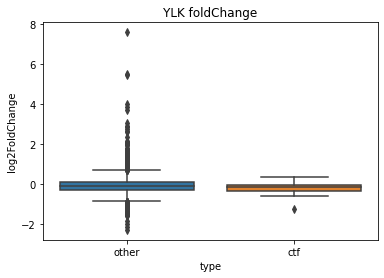

In [177]:
ax = sns.boxplot(data=re,x='type',y='log2FoldChange').set_title("YLK foldChange")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_YLK_logfch.pdf")

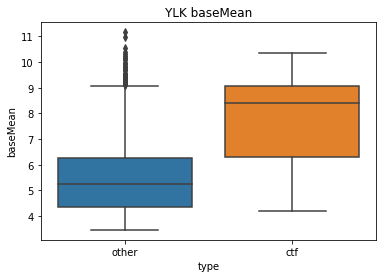

In [178]:
ax =sns.boxplot(data=re,x='type',y='baseMean')
ax.set_title("YLK baseMean")
ax.figure.savefig('../results/'+project+"/plots/"+version+"_"+scaling+"_whiskers_YLK_baseMean.pdf")

## Regular volcanos

In [179]:
res.to_csv("../results/"+project+"/"+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove)+'_deseq.csv')

we can conclude that we get similar results to the slamseq myc paper although it seems that our values are a bit skewed toward higher expression than what is on the slamseq paper. It mightt be explained by the pseudo count of 1 that I did not set. Because I think it would highly bias the DESeq algorithm.

In [75]:
plot.volcano(res,tohighlight=ctf, searchbox=True, title='DESeq results of MV411 under YLK inhibition as volcano plot', folder='../results/'+project+'/plots/'+version+'_'+scaling+"_"+str(minvar_toremove)+'_'+str(mincount_toremove))

/home/jeremie/.local/lib/python3.8/site-packages/bokeh/io/saving.py:125: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/home/jeremie/.local/lib/python3.8/site-packages/bokeh/io/saving.py:138: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


Column(id='2634', ...)

### Readcounts version

In [858]:
%store res

%store tccounts
%store readcounts
%store ctf

Stored 'res' (Series)
Stored 'tccounts' (DataFrame)
Stored 'readcounts' (DataFrame)
Stored 'ctf' (list)


In [860]:
version

'vAll'